In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
input = df.loc[:, ["Pclass", "Sex", "Age", "Fare"]]
input

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [11]:
from sklearn.preprocessing import LabelEncoder

In [13]:
sex_encoder = LabelEncoder()

In [15]:
input["sex_encode"] = sex_encoder.fit_transform(input["Sex"])

In [17]:
input

,Pclass,Sex,Age,Fare,sex_encode
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,0
4,3,male,35.0,8.0500,1
...,...,...,...,...,...
886,2,male,27.0,13.0000,1
887,1,female,19.0,30.0000,0
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [19]:
target = df.loc[:, "Survived"]
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [21]:
model = DecisionTreeClassifier()

In [27]:
input.drop("Sex", axis=1)

,Pclass,Age,Fare,sex_encode
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,NaN,23.4500,0
889,1,26.0,30.0000,1


In [25]:
model.fit(input.drop("Sex", axis=1), target)

DecisionTreeClassifier()

In [31]:
model.score(input.drop("Sex", axis=1), target)*100

97.8675645342312

### accuracy is not good, as I didn't applied any preprocessing to handle the NAN values, and also didn't used any train test split metric

In [70]:
# handling the nan values
input["Age"] = input.Age.fillna(round(input.Age.mean()))
input.head()

,Pclass,Sex,Age,Fare,sex_encode
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,0
4,3,male,35.0,8.0500,1


In [72]:
input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    object 
 2   Age         891 non-null    float64
 3   Fare        891 non-null    float64
 4   sex_encode  891 non-null    int32  
dtypes: float64(2), int32(1), int64(1), object(1)
memory usage: 31.5+ KB


In [74]:
input.drop("Sex", axis=1, inplace=True)
input.tail()

,Pclass,Age,Fare,sex_encode
886,2,27.0,13.00,1
887,1,19.0,30.00,0
888,3,30.0,23.45,0
889,1,26.0,30.00,1
890,3,32.0,7.75,1


In [76]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size = 0.2, random_state=7)

In [99]:
prcess_model = DecisionTreeClassifier()

In [101]:
prcess_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [105]:
prcess_model.score(X_test, y_test)*100

80.44692737430168

### Now the accuracy is low, but it's more accurate, as we filled the null values in the Age column. And also we used train test split method which now give the accurate answers

In [110]:
y_pred = prcess_model.predict(X_test)

In [118]:
from sklearn.metrics import confusion_matrix

In [123]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[98, 12],
       [23, 46]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

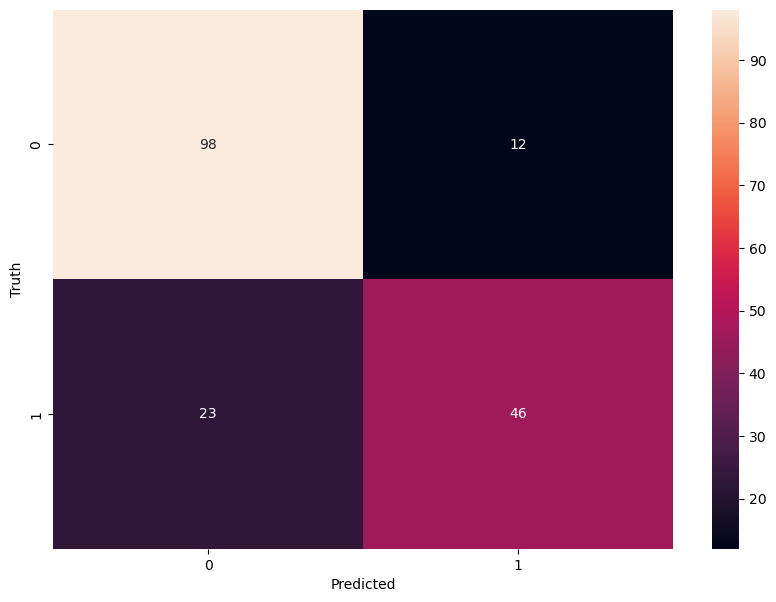

In [127]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')